# Tom vs Jerry

<br>

<p>In this project, we will <b>simulate a game of Tom vs Jerry.</b></p>

<p>In the game, there are two groups of characters, Tom and Jerry.</p> 

<p>Tom and Jerry both have two fixed attributes: <b>"prank" and "dodge"</b><br>
    ---"prank" is considered to be Tom's strong suit; while Jerry is better at "dodge".</p>

<p><b>Tom's iteration path is as follows:</b><br>
    Tom has an initial "prank" of 50, and a random integer between 1 and 9 is added every month; <br>
    Tom has an initial "dodge" of 10, and a random integer between 1 and 3 is added every month; <br>
    When "prank" >= 100, it is considered mature and its development stops.</p>

<p><b>Jerry's iteration path is as follows:</b><br>
    Jerry has an initial "prank" of 10, and a random integer between 1 and 3 is added every month; <br>
    Jerry has an initial "dodge" of 10, and a random integer between 8 and 10 is added every month; <br>
    When "dodge" >= 100, it is considered mature and its development stops.</p>
<br>
    
## 4 Tasks Included:

<br>

<p>Their respective growth paths and time to maturity features will be evaluated through line graphs and histograms.<br>
Also, their characteristic distribution and win rate are compared by scattered plots and pie charts.</p>

<p>We aim at learning about the applications of matplotlib and numpy in data visualisation with these tasks.</p>

In [1]:
# Import required modules

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Define the two attributes

class Character:
    def __init__(self, prank, dodge, time_to_maturity):
        self.prank = prank
        self.dodge = dodge
        self.time_to_maturity = time_to_maturity

In [3]:
# Define the two groups, "Tom" and "Jerry"

class Tom(Character):
    def __init__(self, prank=50, dodge=10, time_to_maturity=0):
        super().__init__(prank, dodge, time_to_maturity)

    def grow(self):
        self.prank += np.random.randint(1, 10)
        self.dodge += np.random.randint(1, 4)
        self.time_to_maturity += 1

class Jerry(Character):
    def __init__(self, prank=10, dodge=10,time_to_maturity=0):
        super().__init__(prank, dodge, time_to_maturity)

    def grow(self):
        self.prank += np.random.randint(1, 4)
        self.dodge += np.random.randint(8, 11)
        self.time_to_maturity += 1

### Task 1: Line Graph Exercise <br> The Respective Growth Paths of Tom and Jerry

<br>

<p>To give players a more intuitive explantion of how Toms (or Jerrys) upgrade themselves, <br>we simulate one example from the population and show its growth paths of the two attributes in one line graph.</p>

In [4]:
# One random data sample of Tom

tom = Tom()
tom_prank_growth = []
tom_dodge_growth = []

while True:
    tom.grow()
    tom_prank_growth.append(tom.prank)
    tom_dodge_growth.append(tom.dodge)
    if tom.prank >= 100:
        break
        
time1 = np.arange(len(tom_prank_growth))

# One random data sample of Jerry
jerry = Jerry()
jerry_prank_growth = []
jerry_dodge_growth = []

while True:
    jerry.grow()
    jerry_prank_growth.append(jerry.prank)
    jerry_dodge_growth.append(jerry.dodge)
    if jerry.dodge >= 100:
        break

time2 = np.arange(len(jerry_dodge_growth))

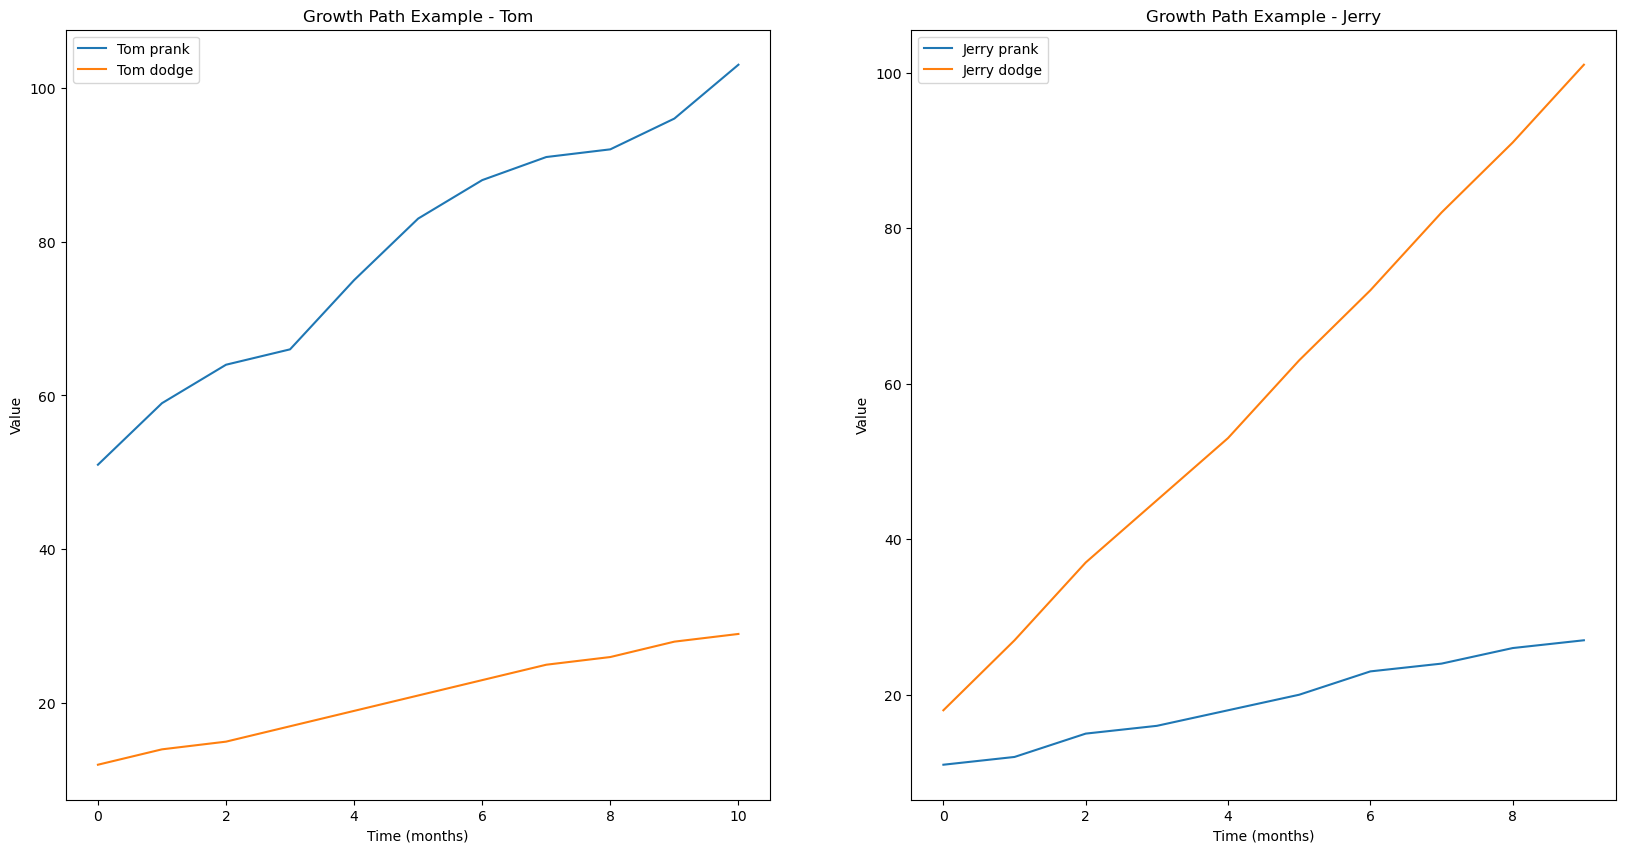

In [5]:
# Draw the graph using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(time1, tom_prank_growth, label='Tom prank')
ax1.plot(time1, tom_dodge_growth, label='Tom dodge')
ax1.set_xlabel('Time (months)')
ax1.set_ylabel('Value')
ax1.set_title('Growth Path Example - Tom')
ax1.legend()

ax2.plot(time2, jerry_prank_growth, label='Jerry prank')
ax2.plot(time2, jerry_dodge_growth, label='Jerry dodge')
ax2.set_xlabel('Time (months)')
ax2.set_ylabel('Value')
ax2.set_title('Growth Path Example - Jerry')
ax2.legend()

plt.show()

### Task 2-4: 200 Toms and 200 Jerrys

<p>In the following tasks, we will need a database of 200 samples of Toms and 200 of Jerrys. 

In [6]:
# Create the Sample Set of 200 Toms and 200 Jerrys
tom_samples_time = []
jerry_samples_time = []

tom_samples = []
jerry_samples = []

for i in range(200):
    tom = Tom()
    jerry = Jerry()
    while tom.prank < 100:
        tom.grow()
    while jerry.dodge < 100:
        jerry.grow()
        
    tom_samples_time.append(tom.time_to_maturity)
    jerry_samples_time.append(jerry.time_to_maturity)
    
    tom_samples.append((tom.prank, tom.dodge))
    jerry_samples.append((jerry.prank, jerry.dodge))

### Task 2: Histogram Exercise <br> The Maturity Time Distribution of The Two Groups

<br>

<p>In this part, we will collect the time required by Toms and Jerrys to mature. <br>We will show the distribution features by histogram.</p>

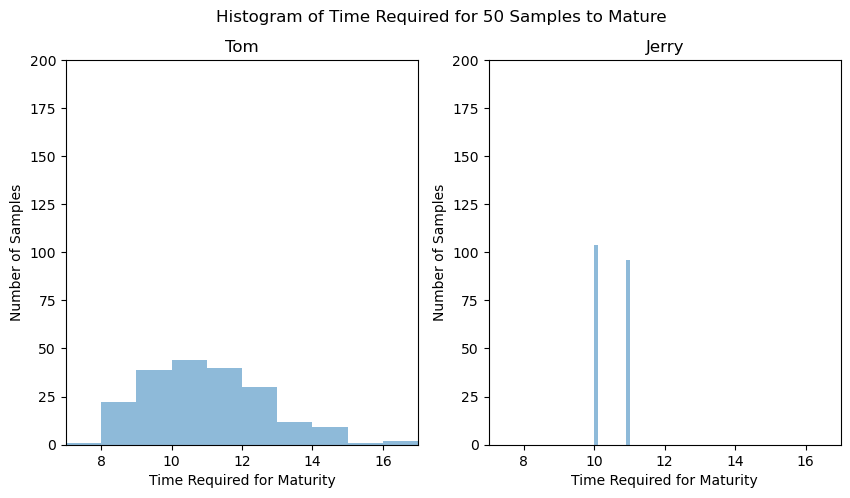

In [7]:
# Plot histograms for Tom and Jerry using subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Histogram of Time Required for 50 Samples to Mature')

max_x = max(max(tom_samples_time), max(jerry_samples_time))
min_x = min(min(tom_samples_time), min(jerry_samples_time))

axs[0].hist(tom_samples_time, bins=10, alpha=0.5, label='Tom')
axs[0].set_title('Tom')
axs[0].set_xlabel('Time Required for Maturity')
axs[0].set_ylabel('Number of Samples')
axs[0].set_xlim(min_x, max_x)
axs[0].set_ylim(0, 200)

axs[1].hist(jerry_samples_time, bins=10, alpha=0.5, label='Jerry')
axs[1].set_title('Jerry')
axs[1].set_xlabel('Time Required for Maturity')
axs[1].set_ylabel('Number of Samples')
axs[1].set_xlim(min_x, max_x)
axs[1].set_ylim(0, 200)

plt.show()

In [8]:
# Calculate the average time required for Toms and Jerrys
tom_avg_time = sum(tom_samples_time) / len(tom_samples_time)
jerry_avg_time = sum(jerry_samples_time) / len(jerry_samples_time)

print('Tom\'s average time to mature:', tom_avg_time)
print('Jerry\'s average time to mature:', jerry_avg_time)

Tom's average time to mature: 10.52
Jerry's average time to mature: 10.48


### Task 3: Scatter Plot Exercise <br> Tom and Jerry Attributes - "prank" and "dodge" values

<br>

<p>In this part, we will display the samples of Tom and Jerry on the same scatter plot to more intuitively show their respective strengths.</p>

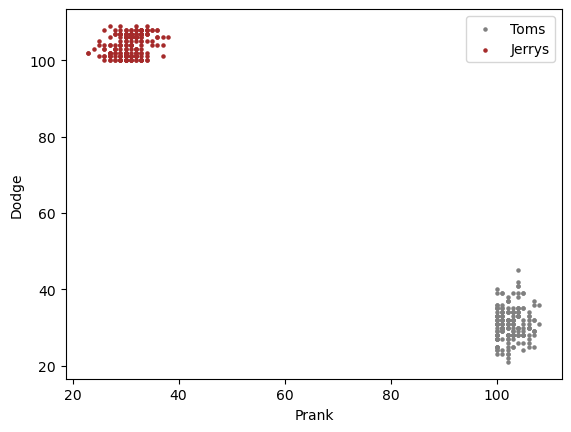

In [9]:
# Plot Toms and Jerrys on the same scatter plot
tom_prank, tom_dodge = zip(*tom_samples)
jerry_prank, jerry_dodge = zip(*jerry_samples)

plt.scatter(tom_prank, tom_dodge, color='gray', label='Toms',s=5)
plt.scatter(jerry_prank, jerry_dodge, color='brown', label='Jerrys',s=5)
plt.xlabel('Prank')
plt.ylabel('Dodge')
plt.legend()

plt.show()

### Task 4: Pie Chart Exercise <br> Tom and Jerry PK Games - win rates
<br>

<p>To simulate a game of Tom vs Jerry, we can randomly select a Tom and a Jerry instance from the samples and let them compete. <br>The character with the higher sum of prank and dodge attributes wins the game. <br><br>We will repeat this process 200 times to collect 200 PK samples, and then calculate the win rates of Tom and Jerry. <br>Finally, we will plot the win rate as a pie chart. </p>

In [10]:
# Simulate the PK Game and Collect 200 Samples
pk_samples = []

for i in range(200):
    tom_index = random.randint(0, 199)
    jerry_index = random.randint(0, 199)
    
    tom_prank, tom_dodge = tom_samples[tom_index]
    jerry_prank, jerry_dodge = jerry_samples[jerry_index]
    
    tom_score = tom_prank + tom_dodge
    jerry_score = jerry_prank + jerry_dodge
    
    if tom_score > jerry_score:
        pk_samples.append('Tom')
    elif jerry_score > tom_score:
        pk_samples.append('Jerry')
    else:
        pk_samples.append('Tie')

In [11]:
# Calculate the Win Rate of Tom and Jerry
tom_wins = pk_samples.count('Tom')
jerry_wins = pk_samples.count('Jerry')
tie_games = pk_samples.count('Tie')
total_games = len(pk_samples)

tom_win_rate = tom_wins / total_games
jerry_win_rate = jerry_wins / total_games
tie_rate = tie_games / total_games

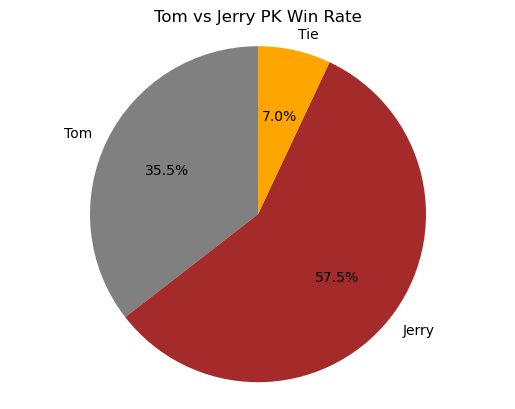

In [12]:
# Plot the Win Rate as a Pie Chart
labels = ['Tom', 'Jerry', 'Tie']
sizes = [tom_win_rate, jerry_win_rate, tie_rate]
colors = ['gray', 'brown', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Tom vs Jerry PK Win Rate')
plt.show()